Please upload the Mall Customers dataset (CSV file)


Saving Mall_Customers.csv to Mall_Customers.csv
Dataset loaded successfully!
Shape of dataset: (200, 5)

Column names in dataset:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Using 'Annual Income (k$)' as Income column
Using 'Spending Score (1-100)' as Spending Score column


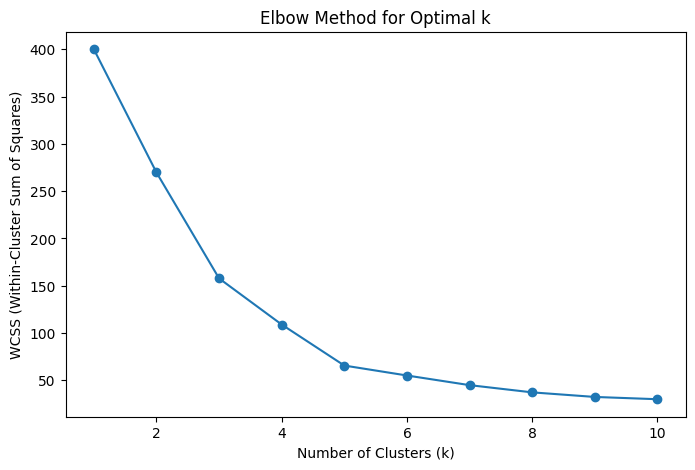

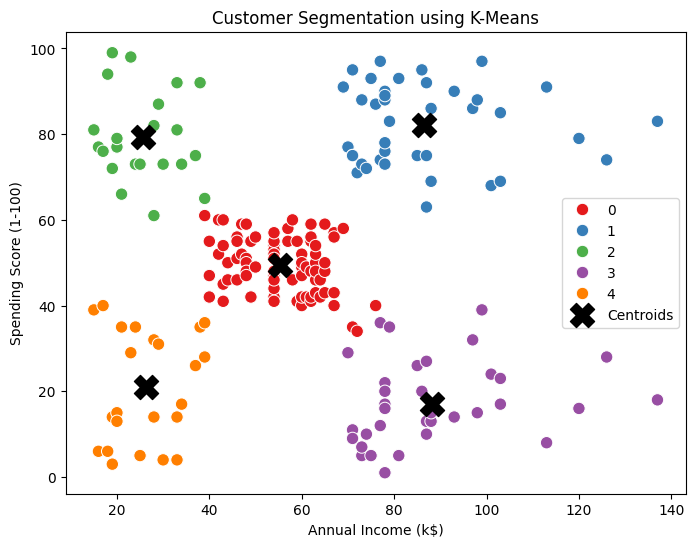

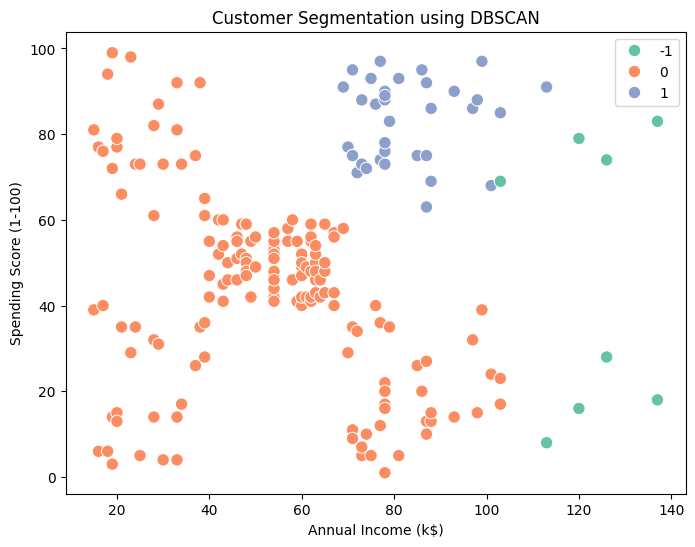


Average Income and Spending Score per Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [1]:
# ------------------------------
# Customer Segmentation Task
# ------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Step 2: Upload dataset
print("Please upload the Mall Customers dataset (CSV file)")
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]

# Step 3: Load dataset
df = pd.read_csv(filename)
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

print("\nColumn names in dataset:")
print(list(df.columns))

# Preview
display(df.head())

# ------------------------------
# Step 4: Select features (Income & Spending Score)
# ------------------------------
# Try to auto-detect income and spending columns
income_col = None
spend_col = None

for col in df.columns:
    if "income" in col.lower():
        income_col = col
    if "spending" in col.lower():
        spend_col = col

if not income_col or not spend_col:
    raise ValueError("Could not detect 'Income' or 'Spending Score' columns. Please rename them properly!")

print(f"\nUsing '{income_col}' as Income column")
print(f"Using '{spend_col}' as Spending Score column")

X = df[[income_col, spend_col]].values

# ------------------------------
# Step 5: Scaling
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Step 6: Elbow Method to find optimal k
# ------------------------------
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# ------------------------------
# Step 7: K-Means Clustering (using k=5 as example)
# ------------------------------
k_opt = 5  # update based on Elbow method
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = y_kmeans

# ------------------------------
# Step 8: Visualization
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_kmeans, palette="Set1", s=80)
plt.scatter(kmeans.cluster_centers_[:,0]*X[:,0].std()+X[:,0].mean(),
            kmeans.cluster_centers_[:,1]*X[:,1].std()+X[:,1].mean(),
            s=300, c='black', marker='X', label='Centroids')
plt.xlabel(income_col)
plt.ylabel(spend_col)
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

# ------------------------------
# Bonus 1: DBSCAN
# ------------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = y_dbscan

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_dbscan, palette="Set2", s=80)
plt.xlabel(income_col)
plt.ylabel(spend_col)
plt.title("Customer Segmentation using DBSCAN")
plt.show()

# ------------------------------
# Bonus 2: Cluster Spending Analysis
# ------------------------------
cluster_analysis = df.groupby('Cluster')[[income_col, spend_col]].mean()
print("\nAverage Income and Spending Score per Cluster:")
print(cluster_analysis)
